In [1]:
using Distributed
ifelse(nprocs()<2, addprocs(3), nothing);

In [2]:
using Plots
using LinearAlgebra
# using Revise
using LatticeQM

# Tutorial: Twisted honeycomb lattices

In [14]:
lat = Geometries2D.honeycomb_twisted(8)

Twist α=3.89°   (n,m)=(8,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       868
Non-spatial dimension: 2
Basis:
3×3 Array{Float64,2}:
 25.5147       12.7574  0.0
 -8.77076e-15  22.0964  0.0
  0.0           0.0     1.0
Orbital/atom coordinates: 
5×868 Array{Float64,2}:
 0.0  13.7568  1.52853   2.52795   …  35.3326  35.2738  37.2726  36.8023
 0.0  22.0624  0.814613  0.780671     20.2635  21.9946  22.0624  21.1799
 1.5   1.5     1.5       1.5          -1.5     -1.5     -1.5     -1.5
 0.0   1.0     0.0       1.0           0.0      0.0      1.0      0.0
 0.0   0.0     0.0       0.0           1.0      1.0      1.0      1.0

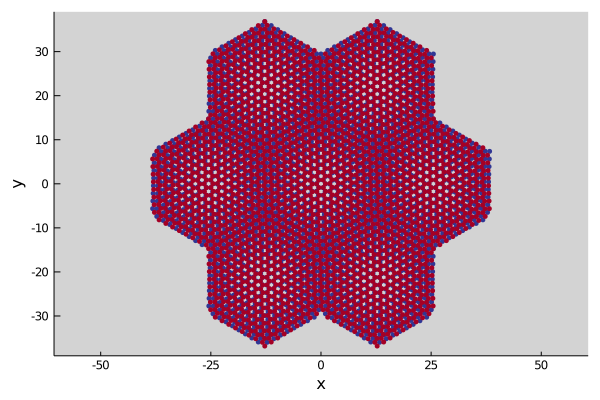

In [15]:
Structure.Lattices.foldPC!(lat; shift=[1/3,1/3,0])
plot(lat, 3; supercell=Structure.Lattices.getneighborcells(lat, 1; halfspace=false, innerpoints=true), sort="layer", markersize=3)

## Model

In [30]:
hops = Operators.graphene(lat; tz=0.12, format=:sparse, mode=:nospin) # specifying format is important here!

# Observables
valley = Operators.valleyoperator(lat; spinhalf=false)

nothing

### Bands

In [31]:
ks = kpath(lat, ["μ2", "γ", "κ", "κ'", "γ", "μ"]; num_points=100)
bands = getbands(hops, ks, valley; format=:sparse, num_bands=25)

Computing bands... 100%|████████████████████████████████| Time: 0:00:10


Number of bands:      25
Number of k-points:   100
Number of obersables: 1
Discrete Path: $\mu_2$→$\gamma$→$\kappa$→$\kappa'$→$\gamma$→$\mu$  (100 points)


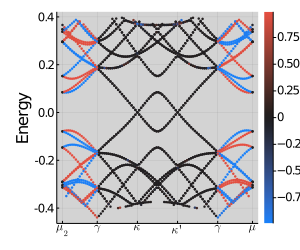

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/wolft/.julia/packages/Plots/ninUP/src/backends/gr.jl:491


In [40]:
plot(bands; size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)

In [ ]:
hops = graphene(lat; mode=:spinhalf, format=:sparse, tz=0.12)
addrashba!(hops, lat, r -> 0.04 * sign(r[3]))
addzeeman!(hops, lat, r -> 0.04 * [0.0, 0.0, sign(r[3])])

kgrid = randomgrid(;nk=8^2, rot_symmetry=6, B=getB(lat))
ωs = collect(range(-0.020, length=100, stop=-0.008))
ldos = Spectrum.ldos(hops, kgrid, ωs; Γ=0.0005, format=:sparse, num_bands=25)